<a href="https://colab.research.google.com/github/MsAnalyst/A-B-Testing-Grocery-Store-Chain/blob/main/Final_Project_A_B_Testing_Dewi_Astuti_(Dewi_I4Zs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Experimentation and A/B Testing Project**

Introduction
Research
Hypothesis
Design & Experiment
Interpretation
Conclusion & Recommendation
References


# **A. Introduction** </font>
---

## **Project Background**


A large grocery chain aims to drive customers to download their mobile app and register for the loyalty program.

You are their analyst and your manager is curious if changing the link to a button of the app store will improve the user's ability to download the app.

Your manager requested for an A/B testing to be done on changing the link to a button of the app store looking forward to increasing user’s interest to download the app.

The goal is to assess whether modifying the link to a button in the app store can boost user interest in downloading the mobile application.


In [ ]:
#Import module to load data
import pandas as pd
import numpy as np

#Visualisation
import matplotlib.pyplot as plt
#import plotly.express as px
#import altair as alt
#import seaborn as sns
#import warnings
#warnings.simplefilter('ignore')

#Import module for stats
#import statsmodels.formula.api as smf
#from statsmodels.formula.api import ols
#import statsmodels.api as sm
import scipy.stats as stats

#setting default theme
#sns.set_theme(style='white', palette='tab20')
#pd.set_option('display.max_columns', None)
#plt.style.use('bmh')
#sns.set()


# **B. Experiment** </font>
---

Grocery website data is available from Kaggle and is stored as .csv named grocerywebsiteabtestdata.csv

### **Import Dataset**

In [ ]:
#Import the data
df=pd.read_csv('grocerywebsiteabtestdata.csv',encoding='latin1')

#Display 10 top rows of the data
df.head (10)

,RecordID,IP Address,LoggedInFlag,ServerID,VisitPageFlag
0,1,39.13.114.2,1,2,0
1,2,13.3.25.8,1,1,0
2,3,247.8.211.8,1,1,0
3,4,124.8.220.3,0,3,0
4,5,60.10.192.7,0,2,0
5,6,23.5.199.2,1,3,0
6,7,195.12.126.2,1,1,0
7,8,97.6.126.6,0,3,1
8,9,93.10.165.4,1,1,0
9,10,180.3.76.4,1,1,0


**Data Definition**
There are 5 column (RecordID, IP Address, LoggedInFlag, ServerID, VisitPageFlag)

* RecordID : identifier of the row of data
* IP Address : address of the user, who is visiting website
* LoggedInFlag : 1 - when user has an account and logged in
* ServerID : one of the servers user was routed through
*  VisitPageFlag : 1 - when user clicked on the loyalty program page

### **Exploratory Data Analysis**

In EDA, we will check:
*   Missing Values and Duplicated Data
*   Data Type
*   Descriptive Statistics

**Check Missing Values and Duplicated Data**

In [ ]:
#Check the proportion of missing values data in each feature.
#Check whether there is any duplicated data.

print("Missing values proportion:")
print(df.isnull().sum()/df.shape[0]) # On missing values in each feature
print("="*50)
print("Duplicated IP Address:")
print(df.duplicated(['IP Address']).sum()) # On IP Address duplicated data
print("Duplicated data:")
print(df.duplicated().sum()) # On duplicated data

Missing values proportion:
RecordID         0.0
IP Address       0.0
LoggedInFlag     0.0
ServerID         0.0
VisitPageFlag    0.0
dtype: float64
Duplicated IP Address:
85072
Duplicated data:
0


In [ ]:
#Drop the duplicated IP Address
df.drop_duplicates(subset='IP Address', inplace=True)
df.shape

(99516, 5)

Result:
- Data is clean, no need to handle missing values.
- There are 85,072 duplicated IP Addresses, so we drop them. Now there are 99,516 total records without duplicates and the data is now ready.

In [ ]:
#Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99516 entries, 0 to 184584
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RecordID       99516 non-null  int64 
 1   IP Address     99516 non-null  object
 2   LoggedInFlag   99516 non-null  int64 
 3   ServerID       99516 non-null  int64 
 4   VisitPageFlag  99516 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


**Descriptive Analysis**
Descriptive analysis process to obtain a general description of the characteristics of each variable seen from the average (mean), maximum and minimum values, standard deviation, and others.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RecordID,99516.0,70278.297610,49932.026011,1.0,27298.5,61378.5,107492.5,184585.0
LoggedInFlag,99516.0,0.503718,0.499989,0.0,0.0,1.0,1.0,1.0
ServerID,99516.0,1.999528,0.816913,1.0,1.0,2.0,3.0,3.0
VisitPageFlag,99516.0,0.057860,0.233480,0.0,0.0,0.0,0.0,1.0


## Data Distribution

Split the dataset into Control and Treatment groups.

In [ ]:
#Length of ServerID when value 1
len(df[df['ServerID']==1])

33229

In [ ]:
#Length of ServerID when value 2
len(df[df['ServerID']==2])

33105

In [ ]:
#Length of ServerID when value 3
len(df[df['ServerID']==3])

33182

In [ ]:
#Compare each ServerID with VisitPageFlag
serverID_with_visitPage = pd.crosstab(df["ServerID"], df['VisitPageFlag'])
serverID_with_visitPage

VisitPageFlag,0,1
ServerID,,
1,30938,2291
2,31359,1746
3,31461,1721


**We set ServerID = 1 as Treatment Group and ServerID = 2 and 3 as Control Group.**

In [ ]:
df['Group'] = np.where(df['ServerID'] == 1, 'Treatment', 'Control')
df.head()

,RecordID,IP Address,LoggedInFlag,ServerID,VisitPageFlag,Group
0,1,39.13.114.2,1,2,0,Control
1,2,13.3.25.8,1,1,0,Treatment
2,3,247.8.211.8,1,1,0,Treatment
3,4,124.8.220.3,0,3,0,Control
4,5,60.10.192.7,0,2,0,Control


In [ ]:
#Length of Control Group
n_control = len(df[df['Group']=='Control'])
n_control

66287

In [ ]:
#Length of Treatment Group
n_treatment = len(df[df['Group']=='Treatment'])
n_treatment

33229

Calculate of sample size = n = 16(0.5)^2 / 0.02^2 = 10.000 users in each variant

From calculating of sample size, we get 10.000 users in each variant. So we can sample using Simple Random Sampling in this dataset.

In [ ]:
#Initializing the number of sample
n = 10_000

In [ ]:
#Choose sample on control
sample_data_control = df[df['Group']=='Control'].sample(n = n,
                                                            replace = False)
#Show sample on control
sample_data_control

,RecordID,IP Address,LoggedInFlag,ServerID,VisitPageFlag,Group
62912,62913,73.9.182.1,1,3,0,Control
62506,62507,197.12.130.6,1,2,0,Control
165621,165622,208.13.172.7,0,2,0,Control
37064,37065,43.7.171.2,1,2,0,Control
12512,12513,197.6.254.1,0,3,0,Control
...,...,...,...,...,...,...
87128,87129,132.1.33.9,0,3,0,Control
82878,82879,230.11.76.9,1,3,0,Control
26198,26199,192.2.232.9,1,2,0,Control
156359,156360,3.15.231.7,0,3,0,Control


In [ ]:
#choose sample on treatment
sample_data_treatment = df[df['Group']=='Treatment'].sample(n = n,
                                                              replace = False)
#show sample on treatment
sample_data_treatment

,RecordID,IP Address,LoggedInFlag,ServerID,VisitPageFlag,Group
28252,28253,63.8.143.2,1,1,0,Treatment
48812,48813,2.0.117.1,1,1,0,Treatment
15502,15503,247.12.147.9,0,1,0,Treatment
123212,123213,167.1.6.6,1,1,0,Treatment
83367,83368,126.5.0.3,0,1,0,Treatment
...,...,...,...,...,...,...
28607,28608,195.5.98.6,0,1,0,Treatment
120999,121000,103.15.209.2,0,1,0,Treatment
34354,34355,128.12.167.3,1,1,0,Treatment
169471,169472,6.7.85.9,0,1,0,Treatment


**Calculate Click-Through-Rate**

<center>

|Group|#User|#Count Clicked|CTR|
|:--|:--:|:--:|:--:|
|Control|10.000|-|-|
|Treatment|10.000|-|-|

</center>

In [ ]:
#Find control group that is CTR
data_control_ctr = sample_data_control[(sample_data_control['VisitPageFlag'] == 1)]

#Length of CTR on control group
n_control_ctr = len(data_control_ctr)
n_control_ctr

501

In [ ]:
#Find treatment group that is CTR
data_treatment_ctr = sample_data_treatment[(sample_data_treatment['VisitPageFlag'] == 1)]

#Length of CTR on treatment group
n_treatment_ctr = len(data_treatment_ctr)
n_treatment_ctr

677

In [ ]:
#Merge sample data control and treatment
data_sample = pd.concat([sample_data_control, sample_data_treatment], ignore_index=True)

#Compare the control and treatment groups on VisitPageFlag
group_with_visitPage = pd.crosstab(data_sample['Group'], data_sample['VisitPageFlag'], margins=True)
group_with_visitPage

VisitPageFlag,0,1,All
Group,,,
Control,9499,501,10000
Treatment,9323,677,10000
All,18822,1178,20000


# TABLE
- We want to fill in the table below

<center>

|Group|Banyak User|Count Converted|Conversion Rate|
|:--:|:--:|:--:|:--:|
|Control|-|-|-|
|Treatment|-|-|-|

</center>

**Visualization**
Visualization of data sample to see their distributions.

Text(0, 0.5, 'Frequency')

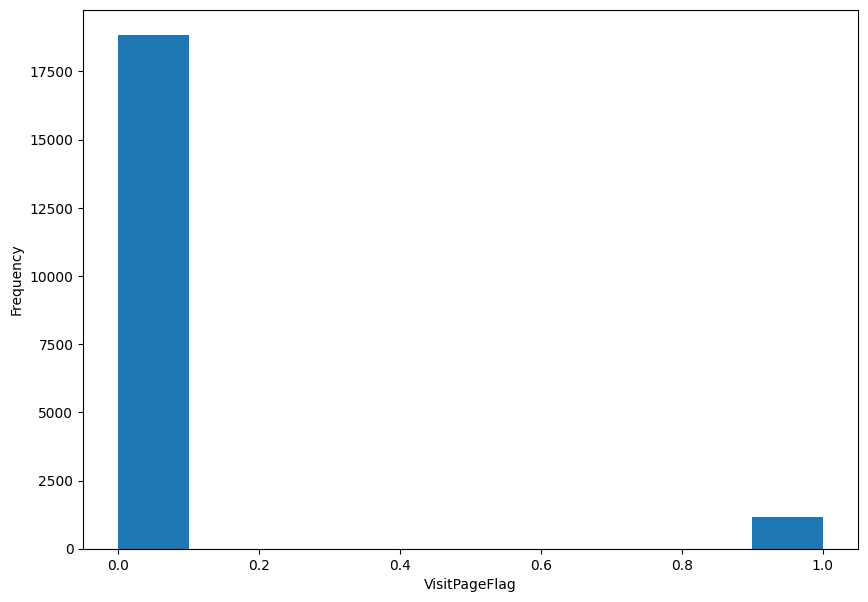

In [ ]:
#Create histogram on data_sample
#bins = 10
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data_sample['VisitPageFlag'],bins=10)

#Show plot
plt.xlabel('VisitPageFlag')
plt.ylabel('Frequency')

Lastly, calculate CTR on each group

In [ ]:
#CTR of control group
ctr_control = n_control_ctr / n
ctr_control

0.0501

In [ ]:
#CTR treatment group
ctr_treatment = n_treatment_ctr / n
ctr_treatment

0.0677

<center>

|Group|#User|#Count Clicked|CTR|
|:--|:--:|:--:|:--:|
|Control|10.000|513|0.0513|
|Treatment|10.000|691|0.0691|

</center>

**Visualisation**

<ipython-input-23-514c1569d4c0>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=["Control", "Treatment"], fontsize=14)


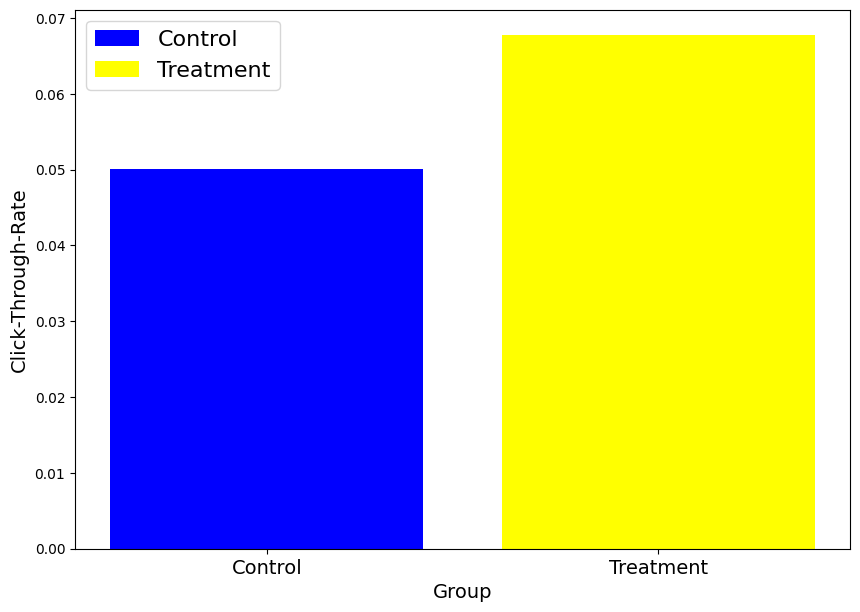

In [ ]:
#Compare CTR visualization of each variant
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))
ax.bar("Control", ctr_control, color="blue", label="Control")
ax.bar("Treatment", ctr_treatment, color="yellow", label="Treatment")

#Style plot
ax.set_ylabel("Click-Through-Rate", fontsize=14)
ax.set_xlabel("Group", fontsize=14)
ax.set_xticklabels(labels=["Control", "Treatment"], fontsize=14)
ax.legend(fontsize=16)
plt.show()

##**Sample Ratio Mismatch (SRM)**
We will detect the SRM using chi-square test

**Pre-Analysis**

Before doing the chi-square test, let's fill in the following table to make it easier to detect the presence of SRM.

<center>

|Group|#User|#Count Clicked|CTR|Percentage|
|:--|:--:|:--:|:--:|:--:|
|Control|10.000|513|0.0513|-|
|Treatment|10.000|691|0.0691|-|

</center>

Percentage is the percentage of sample size in each group

In [ ]:
#Determine the number of users in the control group
n_control = sample_data_control.shape[0]

n_control

10000

In [ ]:
#Determine the number of users in the treatment group
n_treatment = sample_data_treatment.shape[0]

n_treatment

10000

In [ ]:
#Calculate the percentage of each group
n_total = data_sample.shape[0]
persen_control = n_control/n_total * 100
persen_treat = n_treatment/n_total * 100

print(f"% control   : {persen_control:.2f}%")
print(f"% treatment : {persen_treat:.2f}%")

% control   : 50.00%
% treatment : 50.00%



<center>

|Group|#User|#Count Clicked|CTR|Percentage|
|:--|:--:|:--:|:--:|:--:|
|Control|10.000|513|0.0513|50.00%|
|Treatment|10.000|691|0.0691|50.00%|

</center>


**Chi-Square Test for Detect SRM**

The steps for doing a chi-square test in order to detect SRM are:

1. Define the null and alternative hypothesis ($H_{0}$  and $H_{1}$ )
$H_{0}$  : No SRM detected
$H_{1}$  : SRM detected


2. Calculate chi-square statistics
x2 = (observed-
Where :
* Observed: the control and variation traffic volumes (sample size), respectively
* Expected: the expected values for control and treatment — i.e. the total observed divided by 2

Observed is the same as #user in each group.

For the calculation expected in each group, we can use the total observed divided by 2.

In [ ]:
observed = [n_control, n_treatment]
total_traffic= sum(observed)
expected = [ total_traffic/2, total_traffic/2 ]

Then we can calculate the chi-square statistics using the function in the scipy library, namely chisquare with steps:

1. Import library
* from scipy.stats import chisquare
2. Use the function chisquare(f_obs, f_exp=...)
* f_obs: Observed frequencies in each category (array)
* f_exp: Expected frequencies in each category. By default the categories are assumed to be equally likely.

In [ ]:
#Calculate chi-square statistics
from scipy.stats import chisquare
chi = chisquare(observed, f_exp=expected)
print(chi)

Power_divergenceResult(statistic=0.0, pvalue=1.0)


3. Define decision rules

In making statistical test decisions, we can use:
* Comparison of chi-square statistics with critical value

  $X^{2}$ > $X^{2}$ ${\alpha, df}$ -> reject $H_{0}$

* Comparison of p-value with alpha

  $pvalue$ < $\alpha$ → reject $H_{0}$

To prove the SRM, we use a p-value = 0.05.
The degree of freedom (df) is calculated as:
$df$ = (rows - 1) x (columns - 1)


In [ ]:
#Comparison of chi-square statistics and critical value
#First, we need to calculate the critical value

#Critical value is the chi-square value at alpha
alpha = 0.05
df=(2-1)*(2-1)

import scipy
chi_critical = scipy.stats.chi2.ppf(1 - alpha, df)
print(f"Critical value: {chi_critical:.3f}")

Critical value: 3.841


In [ ]:
#Make decisions from chi-square statistics and critical value comparison
if chi[0] > chi_critical:
  print("Reject H0 : SRM may be present.")
else:
  print("Fail to reject H0 : No SRM")

Fail to reject H0 : No SRM


In [ ]:
#Compare P-Value with alpha
if chi[1] < 0.01:
    print('Reject H0 : SRM may be present.')
else:
    print('Fail to reject H0 : No SRM.')

Fail to reject H0 : No SRM.


Based on the detection of SRM, SRM was not detected.

**Hypothesis testing**

Define null hypothesis ($H_{0}$) and alternative hypothesis ($H_{1}$)
$H_{0}$ (Null Hypothesis) : CTR New link, such as in picture not text ≤ existing link

$H_{1}$ (Alternative Hypothesis) : CTR New link, such as in picture not text > existing link

* Conduct statistical test and let's fill in the following table

<center>

|Z statistics|P-value|Selisih antar CTR
|:--:|:--:|:--:|
|-|-|-|

</center>

* We need to do a statistical test to find out whether the differences obtained are statistically significant.
* Define $Z_{crit}$, $Z_{statistics}$ and p-value  
* To calculate it, we can use the statsmodel library

In [ ]:
#Import this library to calculate
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

1. Calculate $Z_{statistics}$ and p-value. We use this function

test_stats, p_value = proportions_ztest(count= ..., nobs = ...,
 alternative = ...)
* With
** count is the number of successful observations
** nobs is the total number of observations
** alternative is a form of hypothesis testing. Can be filled with two-sided, smaller, or larger
* Make count convert & total observation

In [ ]:
#Create count convert & total observation
count_convert = [n_treatment_ctr, n_control_ctr]
count_observation = [n_treatment, n_control]

In [ ]:
n_treatment

10000

In [ ]:
n_control

10000

In [ ]:
n_treatment_ctr

677

In [ ]:
n_control_ctr

501

* create an alternative for this hypothesis test case
* if we want to prove $H_{1}$ is not the same as a value, use two-sided
* if $H_{1}$ is greater than a value, use larger
* if $H_{1}$ is smaller than a value, use smaller
* in this case, we use larger because we want to prove $CTR_{new}$ is greater than $CTR_{old}$

In [ ]:
#Make alternative
alternative_option = "larger"

In [ ]:
#Calculate
#Call function
z_stat, p_value = proportions_ztest(count = count_convert,
                                    nobs = count_observation,
                                    alternative = alternative_option)

print(f"Z stats : {z_stat:.4f}")
print(f"P-value : {p_value}")

Z stats : 5.2859
P-value : 6.253082959940072e-08


Next, we calculate the difference between the new & old CR

In [ ]:
ctr_treatment - ctr_control

0.017599999999999998

In [ ]:
#We now calculate the relative effect which shows how much the percentage increase or decrease in the CTR treatment compared to the control
relative_effect_CTR = (ctr_treatment - ctr_control)/ctr_control * 100

print(f"relative effect = {relative_effect_CTR:.3} %")

relative effect = 35.1 %


There is a relative increase of 35.1%

**Summarize the results of statistical tests**

In [ ]:
#From p-value
alpha = 0.05        # the confidence level that we set

#Make a decision based on p_value and alpha
if p_value < alpha:
    print("Decision : Reject Null Hypothesis")
else:
    print("Decision : Fail to Reject Null Hypothesis")

Decision : Reject Null Hypothesis


In [ ]:
#Find Z critical as the z-value at alpha
z_critical = stats.norm.ppf(1 - alpha)
z_critical

1.6448536269514722

In [ ]:
#From z-statistics
#Create the decision based on z_critical and alpha
if z_stat > z_critical:
    print("Decision : Reject Null Hypothesis")
else:
    print("Decision : Fail to Reject Null Hypothesis")

Decision : Reject Null Hypothesis


**Visualisation**
* We create a visualisation of the results of this statistical test showing the distribution of z values
* Therefore, we have to find the value of
z when alpha = 0.05 or Zcritical
* We use the following library:

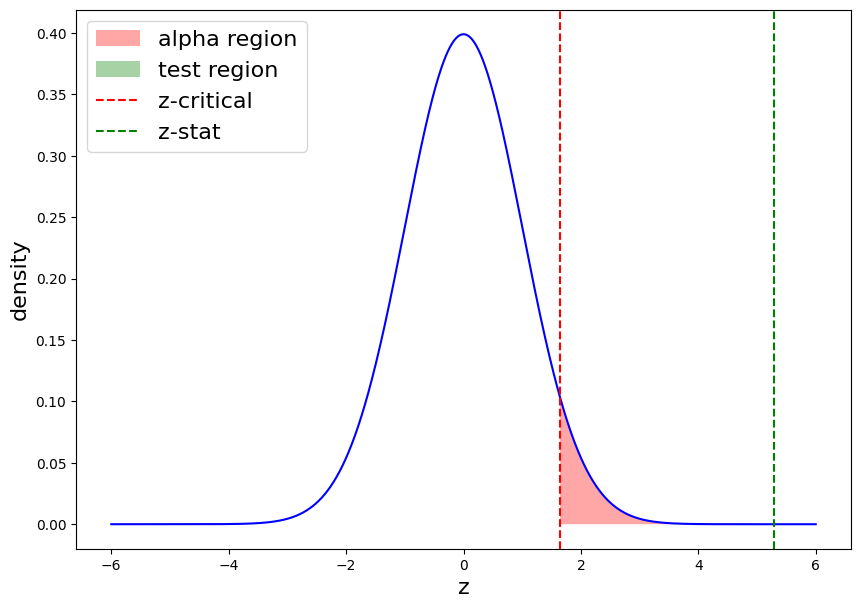

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

#Create sample distribution plots
x_sample = np.arange(-6., 6., 0.001)
y_sample = stats.norm.pdf(x_sample, 0, 1)
ax.plot(x_sample, y_sample,
        color = "blue")

#Find the region plot of alpha (region where H-0 is rejected)
#This region is red
x_alpha = np.arange(z_critical, 6., 0.001)
y_alpha = stats.norm.pdf(x_alpha)
ax.fill_between(x = x_alpha,
                y1 = y_alpha,
                facecolor = "red",
                alpha = .35,
                label = "alpha region")


#Plot the region of the sample we find
#This region is green
x_test = np.arange(z_stat, 6., 0.001)
y_test = stats.norm.pdf(x_test)
ax.fill_between(x = x_test,
                y1 = y_test,
                facecolor = "green",
                alpha = .35,
                label = "test region")

#Plot vertical line alpha
ax.axvline(z_critical,
           color = "red",
           linestyle = "--",
           label = "z-critical")

#Plot vertical line test
ax.axvline(z_stat,
           color = "green",
           linestyle = "--",
           label = "z-stat")


#Style the plot
ax.set_xlabel("z", fontsize=16)
ax.set_ylabel("density", fontsize=16)

plt.legend(fontsize=16)
plt.show()

* the area of the green region < the area of the red region (the region where $H_{0}$ is rejected)
* that is, the probability of getting $H_{0}$ from the sample is even smaller than the alpha limit we set.
* that statistically, we don't have enough evidence to accept $H_{0}$ (small p-value less than $\alpha$, so $H_{0}$ rejected

# **Interpretation**

* p-value (6.061722707735026e-08) < 𝛼 (0.05) → Reject $H_{0}$
* z statistics (5.2916) > z critical (1.644) → Reject $H_{0}$  

with significance level 5%, there is sufficient evidence that CTR New link such as in picture not text (treatment) more than existing link (control)

in other words

CTR New link, such as in picture not text will increase user interest in downloading the application.

**Confidence interval of difference between treatment and control**

In [ ]:
from statsmodels.stats.proportion import confint_proportions_2indep

confidence_interval = confint_proportions_2indep(count1 = n_treatment_ctr, nobs1 = n_treatment,
                                                 count2 = n_control_ctr, nobs2 = n_control,
                                                 compare='diff', alpha=0.05)
print(confidence_interval)

(0.011083187318602371, 0.024140882960610233)


Based on these results, we are 95% sure that the difference in the proportion of users who clicked on the new link (CTR) in the treatment (B) and control (A) groups lies between 0.0079 and 0.0212.

Or it can be said that the increase in users when downloading applications using new links such as in picture (not text) (treatment) increases by 0.0079 to 0.0212.

# **Recommendation**

Recommendations for website of the grocery store chain :
1. Based on the statistical test results, the results are statistically significant. P-value = 0.05 indicates that there is a 5% probability that the observed difference is due to chance or other factors unrelated to the variable being observed.
2. But to make a decision whether to change the link to a button of the app store or not, must be practically significant such as :
* Resources and costs required to implement the change. If the cost required for the change to the link to a button of the app store on the website is very high and not proportional to the impact on mobile app downloads, then the change may not be considered practically significant.
* It is also necessary to consider the difference between performance before and after the change. If the change to the link to a button of the app store on the website can increase mobile app downloads by 1% or more, then the change may be considered practically significant. However, if the change only increases mobile app downloads by 0.1% or less, then the change may not be considered practically significant.
3. Based on the above considerations, the change is considered practically significant.

**Recommendation for the next experiment :**
1. Download page variants: change the layout or content of the mobile app download page, such as adding images or positive reviews from other users.
2. App description: Change the app description on the website, such as highlighting the benefits or advantages of the app.
3. Changes to the overall appearance and content of the website: Changing the overall layout, design, and content of the website can affect the way users interact with the website.
4. Target audience: There may be certain groups of users who are more likely to download apps than others, so changing the look and content of the website to appeal more to certain target groups could be a recommendation for future experiments.